In [1]:
"""This code takes some time to run due to the high number of sampled data points
and the high switching rates
Decrease T = 1000000 for quicker but less accurate empirical PDF
or reduce the number of eval_points from 1000 e.g. to 100"""

#importing useful libraries
import numpy as np
import matplotlib.pyplot as plt

#getting current directory
import os
cwd = os.getcwd()

#importing all the functions
%run ../functions_MCMC

In [2]:
#time lengths
delta_t = 0.3 
T = 1000000

#define parameters of the two-state model with ratesx10
V = np.array([2000, -1500])
Lambda = np.array([1, 0.5])*8
P = np.array([[0.0, 1], [1, 0.0]])
sigma = 50
n = Lambda.shape[0]

#running the model
x_sim, y_sim, t_sim, sw, st = n_state_model(delta_t, T, V, Lambda, P, sigma)

#constructing the increments
delta_y = np.array([y_sim[i]-y_sim[i-1] for i in range(1, len(y_sim))])

#define points for which we need the PDF approximation    
eval_points = np.linspace(np.min(delta_y), np.max(delta_y), 1000)

#compute the PDF approximation - up-to-one-switch
approx_pdf_res = approx_pdf_up_to_1_switch(V, Lambda, P, sigma, delta_t, eval_points)

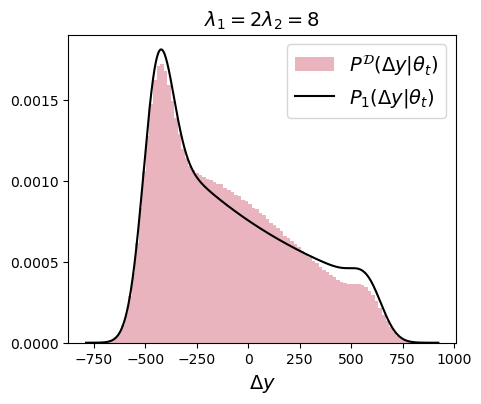

In [5]:
#plot data vs best fit
nbins = min(int(delta_y.shape[0]/10), 100)

plt.figure(figsize=(5,4))
plt.hist(delta_y, bins=nbins, density=True, color='#d46a7e', alpha=0.5,
         label=r'$P^\mathcal{D}(\Delta y | \theta_t)$')

plt.plot(eval_points, approx_pdf_res, color='black', label=str(r'$P_1(\Delta y |\theta_t)$'))
    
plt.legend(fontsize=14)
plt.yticks([0, 0.0005, 0.001, 0.0015])
plt.xlabel(r'$\Delta y$', fontsize=14)
plt.title(r'$\lambda_1=2\lambda_2=8$', fontsize=14)
plt.savefig("PDF_comparison_2_ratesx8.png", format="png", dpi=1200, bbox_inches="tight")